In [ ]:
!pip install opencv-contrib-python opencv-python-headless matplotlib scikit-learn networkx --quiet

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import networkx as nx
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bridge.jpg to bridge.jpg


In [ ]:
img = cv2.imread('bridge.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

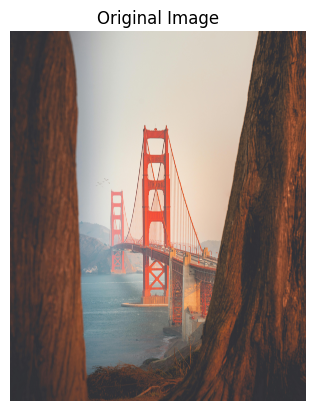

In [ ]:
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

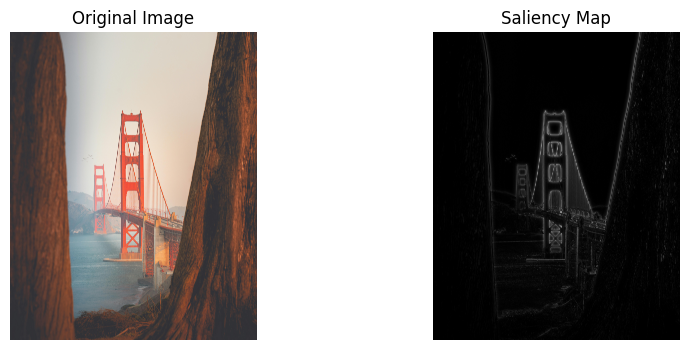

In [ ]:
def saliency_detection(img_rgb):
    saliency = cv2.saliency.StaticSaliencyFineGrained_create()
    (success, saliencyMap) = saliency.computeSaliency(img_rgb)
    saliencyMap = (saliencyMap * 255).astype("uint8")

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(saliencyMap, cmap='gray')
    plt.title('Saliency Map')
    plt.axis('off')
    plt.show()

saliency_detection(img_rgb)

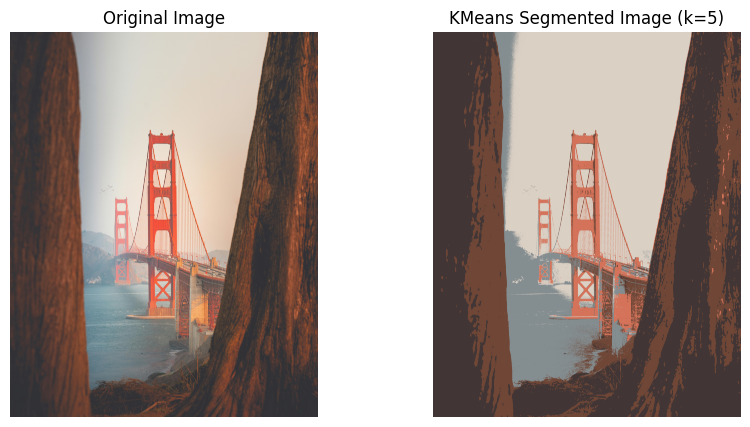

In [ ]:

def kmeans_segmentation(img_rgb, k=5):
    img_reshape = img_rgb.reshape((-1,3))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(img_reshape)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(img_rgb.shape).astype(np.uint8)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(segmented_img)
    plt.title(f'KMeans Segmented Image (k={k})')
    plt.axis('off')
    plt.show()

kmeans_segmentation(img_rgb, k=5)

In [ ]:
def graph_cut_segmentation(img_rgb):
    mask = np.zeros(img_rgb.shape[:2], np.uint8)

In [ ]:
    bgdModel = np.zeros((1,65), np.float64)
    fgdModel = np.zeros((1,65), np.float64)

In [ ]:
   rect = (50, 50, img_rgb.shape[1]-100, img_rgb.shape[0]-100)

In [ ]:
mask = np.zeros(img_rgb.shape[:2], np.uint8)

In [ ]:
 cv2.grabCut(img_rgb, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)